In [22]:
import wm_utility
import bluepy
import voxcell
import yaml
import numpy

# Path to the flatmap to use
fn_fm = "/gpfs/bbp.cscs.ch/project/proj83/home/bolanos/BB_Rat_SSCX_flatmap_v2.nrrd"

# Path to the wm-style recipe that has been used to create the connectivity
fn_recipe = "./data/rat_wm_recipe_tr_ll_ul_un_n_m_subtract_adjacents.yaml"

# Path to the Circuit used
fn_circ = "/gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20200805/CircuitConfig_TC_WM"

# LOAD!
fm = voxcell.VoxelData.load_nrrd(fn_fm)
with open(fn_recipe, "r") as fid:
    recipe = yaml.load(fid, Loader=yaml.SafeLoader)
circ = bluepy.Circuit(fn_circ)
hier = circ.atlas.load_region_map()
ann = circ.atlas.load_data("brain_regions")

In [28]:
# Path to a pixel-to-pixel connectivity result
# Use scripts/count_adjacent_connectivity.py in https://bbpgitlab.epfl.ch/conn/configs/thalamo-neocortex-connectivity

fn_pixel2pixel = None # "/gpfs/bbp.cscs.ch/project/proj83/scratch/home/reimann/connectome_analysis/Bio_M_20200805/total_synapse_counts/flat_locations_connection_counts_exc.pkl"
if fn_pixel2pixel is None:
    print("Command to run:\ncount_adjacent_connectivity.py -o res_wm_pixel_to_pixel.pkl -p projection_to_validate - f {0} {1}".format(fn_fm, fn_circ))
    print("\t-- where projection_to_validate is one of:")
    for proj in circ.config["projections"].keys():
        print("\t\t" + proj)

Command to run:
count_adjacent_connectivity.py -o res_wm_pixel_to_pixel.pkl -p projection_to_validate - f /gpfs/bbp.cscs.ch/project/proj83/home/bolanos/BB_Rat_SSCX_flatmap_v2.nrrd /gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20200805/CircuitConfig_TC_WM
	-- where projection_to_validate is one of:
		intra_SSCX_midrange_wm
		Thalamocortical_input_VPM
		Thalamocortical_input_POM


In [2]:
rgb_img, region_lo = wm_utility.wm_recipe_utility.recipe2source_rgb(recipe, fm, hier, ann, subsample=2)

In [3]:
tgt_img = wm_utility.anterograde_connectivity_rgb_image(fn_pixel2pixel, rgb_img)

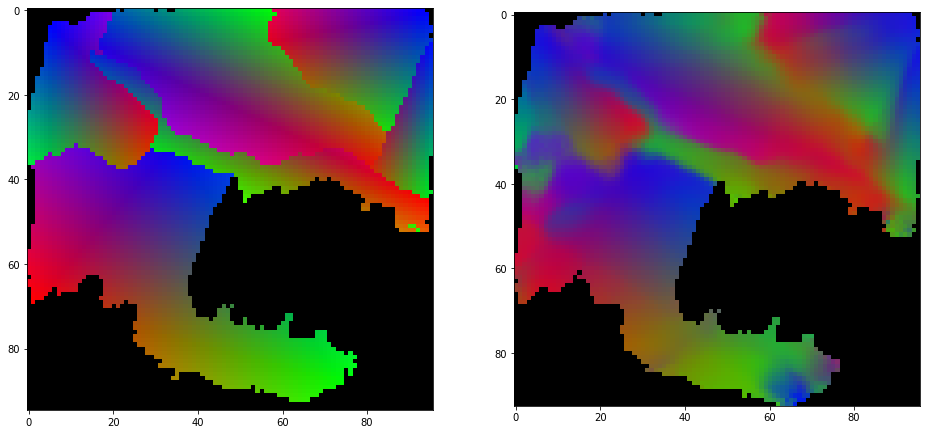

In [5]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(rgb_img)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(tgt_img)

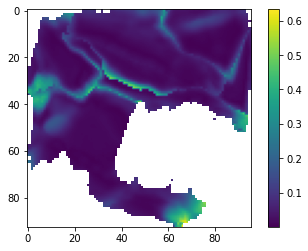

In [21]:
rgb_img = rgb_img[:tgt_img.shape[0], :tgt_img.shape[1], :]
plt.colorbar(plt.imshow(numpy.mean(numpy.abs(tgt_img - rgb_img), axis=2)))